In [1]:
import os
from astropy.io import fits
import pandas as pd 
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
path = '/mnt/flock/jahumada/testdata_hits/raw_Paula/'

In [2]:
p = '/mnt/flock/jahumada/testdata_hits/raw_Paula/pointing10/c4d_150224_020540_ori.fits.fz'
#fits.open(p)[0].header

In [19]:
p = '/mnt/flock/jahumada/testdata_hits/calib_Paula/c4d_150226_214619_fri.fits.fz'
#fits.open(p)[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                   70 / Number of extensions                           
PROCTYPE= 'RAW     '           / Data processing level                          
PRODTYPE= 'image   '           / Data product type                              
DETSIZE = '[1:29400,1:29050]'  / Detector size                                  
PIXSCAL1=                 0.27 / [arcsec/pixel] Pixel scale, axis 1             
PIXSCAL2=                 0.27 / [arcsec/pixel] Pixel scale, axis 2             
FILENAME= 'DECam_00415213.fits' / Filename                                      
OBS-LONG=    70.81489000000001 / [deg] Observatory east longitude               
TELESCOP= 'CTIO 4.0-m telesc

In [2]:
path = '/mnt/flock/jahumada/testdata_hits/raw_Paula/'
import shutil

for pointing in os.listdir(path):
    for file in os.listdir(path+pointing):
        hdu = fits.open(path+pointing+'/'+file)
        date_obs = hdu[0].header['DATE-OBS']
        #print(date_obs[:10])
        if date_obs[:10] == '2015-02-26':
            #print('entreeeee')
            shutil.move(path+pointing+'/'+file, '/mnt/flock/jahumada/testdata_hits/night20150226')

path2 = '/mnt/flock/jahumada/testdata_hits/calib_Paula'
for file in os.listdir(path2):
    hdu = fits.open(path2+'/'+file)
    date_obs = hdu[0].header['DATE-OBS']
    #print(date_obs[:10])
    if date_obs[:10] == '2015-02-26':
        #print('entreee-calib')
        shutil.move(path2+'/'+file, '/mnt/flock/jahumada/testdata_hits/night20150226')


In [27]:
0.25*u.arcsec*4000

<Quantity 1000. arcsec>

In [3]:
ALL = pd.DataFrame(columns=['blind', 'path','ra','dec'])
#object_name = []
for pointing in os.listdir(path):
    for file in os.listdir(path+pointing):
        hdu = fits.open(path+pointing+'/'+file)
        
        object_name = hdu[0].header['OBJECT']
        ra = hdu[0].header['RA']
        dec = hdu[0].header['DEC']
        c = SkyCoord(ra + ' ' + dec, unit = (u.hourangle, u.deg))
        A = c.to_string('decimal').split(' ')
        ra_decimal = A[0]
        dec_decimal = A[1]
        ALL = ALL.append({'blind':object_name, 'path':path+pointing+'/'+file, 'ra':ra_decimal, 'dec':dec_decimal}, ignore_index=True)
        #print(hdu[0].header['OBJECT'])

In [7]:
ALL

,blind,path,ra,dec
0,Blind14A_35,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,170.06,0
1,Blind14A_35,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,170.06,0
2,Blind14A_35,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,170.06,0
3,Blind14A_35,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,170.06,0
4,Blind14A_35,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,170.06,0
...,...,...,...,...
1320,Blind15A_46,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,159.166,1.86006
1321,Blind15A_46,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,159.166,1.86006
1322,Blind15A_46,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,159.166,1.86006
1323,Blind15A_46,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,159.166,1.86006


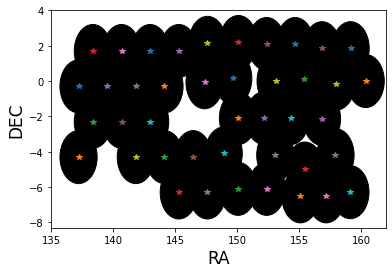

In [4]:
import matplotlib.pyplot as plt

RA = ALL['ra']
DEC = ALL['dec']
RADEC = [['{0:.8g}'.format(float(ra)),'{0:.7g}'.format(float(dec))] for ra, dec in zip(RA, DEC)]
len(np.unique(RADEC, axis =0))
RADEC_unique = np.unique(RADEC, axis =0)
for ra, dec in RADEC_unique:
    #print(ra,dec)
    c1= plt.Circle((float(ra),float(dec)), radius=1.5, color='black')
    plt.gca().add_artist(c1)
    plt.xlabel('RA', fontsize=17)
    plt.ylabel('DEC', fontsize=17)
    plt.xlim(135,162)
    plt.ylim(-8.3,4)
    plt.plot(float(ra),float(dec), '*')
plt.show()

In [23]:
rraa = [float(ra) for ra in RADEC_unique[:,0]]
np.transpose(rraa)
ddeec = [float(dec) for dec in RADEC_unique[:,1]]
np.transpose(ddeec)
len(rraa)

42

In [37]:
data = ['Blind14A_01', 'Blind14A_02', 'Blind14A_03', 'Blind14A_04',
       'Blind14A_05', 'Blind14A_06', 'Blind14A_07', 'Blind14A_08',
       'Blind14A_09', 'Blind14A_10', 'Blind14A_13', 'Blind14A_14',
       'Blind14A_16', 'Blind14A_19', 'Blind14A_20', 'Blind14A_21',
       'Blind14A_22', 'Blind14A_23', 'Blind14A_24', 'Blind14A_25',
       'Blind14A_26', 'Blind14A_27', 'Blind14A_28', 'Blind14A_30',
       'Blind14A_33', 'Blind14A_34', 'Blind14A_35', 'Blind14A_36',
       'Blind14A_37', 'Blind14A_38', 'Blind14A_39', 'Blind14A_40',
       'Blind15A_02', 'Blind15A_03', 'Blind15A_04', 'Blind15A_05',
       'Blind15A_06', 'Blind15A_07', 'Blind15A_08', 'Blind15A_12',
       'Blind15A_13', 'Blind15A_14', 'Blind15A_15', 'Blind15A_16',
       'Blind15A_17', 'Blind15A_19', 'Blind15A_20', 'Blind15A_21',
       'Blind15A_22', 'Blind15A_24', 'Blind15A_25', 'Blind15A_26',
       'Blind15A_27', 'Blind15A_28', 'Blind15A_29', 'Blind15A_30',
       'Blind15A_31', 'Blind15A_33', 'Blind15A_34', 'Blind15A_35',
       'Blind15A_36', 'Blind15A_37', 'Blind15A_38', 'Blind15A_39',
       'Blind15A_40', 'Blind15A_41', 'Blind15A_42', 'Blind15A_43',
       'Blind15A_44', 'Blind15A_45', 'Blind15A_46', 'Blind15A_47',
       'Blind15A_49', 'Blind15A_50']

stay = np.ones(len(data))

In [25]:
[1.5]*42

[1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5,
 1.5]

In [23]:
DF = pd.read_csv('Panchos_data.txt', sep=' ')
#DataFrame(zip(data,stay), columns = ['ob_name', 'stay'])
DF['stay'] = 1
DF

,blind,ccd,ra,dec,stay
0,Blind14A_26,N11,166.638,-2.298500,1
1,Blind14A_09,N4,155.393,-4.973390,1
2,Blind15A_35,N23,152.799,1.495800,1
3,Blind14A_07,N17,154.390,-2.486080,1
4,Blind15A_35,S21,152.043,2.614390,1
...,...,...,...,...,...
119,Blind15A_41,N9,156.814,-6.823430,1
120,Blind14A_38,N8,171.615,0.249394,1
121,Blind14A_01,S19,153.020,-1.725780,1
122,Blind15A_26,S9,149.797,2.498180,1


In [24]:
Big_table = pd.merge(DF, ON, on='blind', how= 'outer')
Big_table

,blind,ccd,ra_x,dec_x,stay,ob_name,path,ra_y,dec_y,teldec,telra
0,Blind14A_26,N11,166.638,-2.2985,1.0,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-2.09589,166.432
1,Blind14A_26,N11,166.638,-2.2985,1.0,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-2.09575,166.432
2,Blind14A_26,N11,166.638,-2.2985,1.0,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-2.09572,166.432
3,Blind14A_26,N11,166.638,-2.2985,1.0,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-2.09586,166.432
4,Blind14A_26,N11,166.638,-2.2985,1.0,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-2.09661,166.432
...,...,...,...,...,...,...,...,...,...,...,...
2518,Blind15A_24,NaN,NaN,NaN,NaN,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-0.0688611,147.389
2519,Blind15A_24,NaN,NaN,NaN,NaN,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-0.0688611,147.389
2520,Blind15A_24,NaN,NaN,NaN,NaN,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-0.0688611,147.389
2521,Blind15A_24,NaN,NaN,NaN,NaN,NaN,/mnt/flock/jahumada/testdata_hits/raw_Paula/po...,NaN,NaN,-0.0688061,147.389


In [5]:
#[print('rm -r '+i) for i in np.array(Big_table[Big_table['stay']!=1]['path'])]
! eups list lsst_distrib -s

   22.0.1-3-g7ae64ea+34933a78b0 	current w_2021_37 w_latest setup


# Here we work with the LSST Science Pipeline modules!

In [2]:
import lsst.afw.display as afwDisplay
from lsst.daf.butler import Butler
import matplotlib.pyplot as plt
import numpy as np

In the following we see the query collections available as of now.

In [3]:
butler = Butler('/home/jahumada/data_hits')
registry = butler.registry
for col in registry.queryCollections():
    print(col)

DECam/calib
DECam/calib/unbounded
DECam/calib/curated/19700101T000000Z
DECam/calib/curated/20130115T013000Z
DECam/calib/curated/20130916T092600Z
DECam/calib/curated/20140117T012900Z
DECam/calib/curated/20141020T103000Z
DECam/calib/curated/20150105T011500Z
DECam/calib/curated/20131130T000000Z
DECam/raw/all
DECam/raw/crosstalk-sources
DECam/raw/crosstalk-sources/20211008T204015Z
hits_master_calib/20150217_bias
hits_master_calib/20150217_bias/20211011T182910Z
hits_master_calib/20150217_flats
hits_master_calib/20150217_flats/20211011T194658Z
DECam/calib/20150217calibs
refcats
processCcdOutputs/20150217_calib
hits_master_calib/20150218_bias
hits_master_calib/20150218_bias/20211022T002123Z
hits_master_calib/on20150219_bias
hits_master_calib/on20150219_bias/20211022T015352Z
hits_master_calib/on20150220_bias
hits_master_calib/on20150220_bias/20211022T015436Z
hits_master_calib/on20150221_bias
hits_master_calib/on20150221_bias/20211022T015505Z
hits_master_calib/on20150219_bias/20211022T015834Z
h

#### With the following we can extract all the exposures availables to calibrate them. We print in the right format to inject to the command! 

In [4]:
exposures = []
data=pd.DataFrame(columns =['exposure','target_name', 'ra', 'dec', 'day_obs'])
for ref in registry.queryDimensionRecords('exposure',where="instrument='DECam' AND exposure.observation_type='science'"):
    exposures.append(ref.dataId['exposure'])
    #print(ref.day_obs)
    new_row = {'exposure':ref.dataId['exposure'], 'target_name':ref.target_name, 'ra':ref.tracking_ra, 'dec':ref.tracking_dec, 'day_obs':ref.day_obs}
    data = data.append(new_row, ignore_index=True)

In [5]:
data[data['target_name']=='Blind15A_02']

,exposure,target_name,ra,dec,day_obs
60,410891,Blind15A_02,137.225152,-4.300827,20150217
138,410947,Blind15A_02,137.225110,-4.300883,20150217
151,410997,Blind15A_02,137.225035,-4.300883,20150217
225,411432,Blind15A_02,137.225035,-4.300911,20150218
238,411231,Blind15A_02,137.225198,-4.300827,20150218
270,411281,Blind15A_02,137.225077,-4.300856,20150218
300,411331,Blind15A_02,137.225152,-4.300856,20150218
309,411381,Blind15A_02,137.225077,-4.300883,20150218
400,411633,Blind15A_02,137.225110,-4.300827,20150219
441,411784,Blind15A_02,137.225035,-4.300911,20150219


In [6]:
print(list(data[data['target_name']=='Blind15A_02'].exposure))

[410891, 410947, 410997, 411432, 411231, 411281, 411331, 411381, 411633, 411784, 411834, 411683, 411734, 412036, 412086, 412226, 412280, 742019, 742013, 742020, 742014]


In [36]:
len(list(data[data['target_name']=='Blind15A_02'].exposure))

17

In [ ]:
exposures.sort()
command = ' '
for i in exposures:
    command = command+str(i)+','
command

In [ ]:
collection = 'processCcdOutputs/20150217_calib'
for ref in butler.registry.queryDatasets('calexp', physical_filter='g DECam SDSS c0001 4720.0 1520.0', collections=collection, instrument='DECam'):
    print(ref.dataId.full)
    
    
    

In [10]:
collection = 'processCcdOutputs/20150217_calib'
for ref in butler.registry.queryDatasets('calexp', physical_filter='g DECam SDSS c0001 4720.0 1520.0', collections=collection, instrument='DECam'):
    print(ref.dataId.full)

{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410895}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410896}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410897}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410902}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410903}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410904}
{band: 'g', instrument: 'DECam', detector: 1, physical_filter: 'g DECam SDSS c0001 

{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410925}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410960}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410965}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410976}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410994}
{band: 'g', instrument: 'DECam', detector: 6, physical_filter: 'g DECam SDSS c0001 

{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411003}
{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411007}
{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411016}
{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411023}
{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411065}
{band: 'g', instrument: 'DECam', detector: 9, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411076}
{band: 'g', instrument: 'DECam', detector: 10, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410895}
{band: 'g', instrument: 'DECam', detector: 10, physical_filter: 'g DECam SDSS c000

{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410902}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410903}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410904}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410905}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410906}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410910}
{band: 'g', instrument: 'DECam', detector: 13, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411003}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411007}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411016}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411023}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411041}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411065}
{band: 'g', instrument: 'DECam', detector: 16, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411076}
{band: 'g', instrument: 'DECam', detector: 17, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410976}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410994}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410998}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411003}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411007}
{band: 'g', instrument: 'DECam', detector: 19, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410925}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410965}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410976}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410994}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410998}
{band: 'g', instrument: 'DECam', detector: 22, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410915}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410918}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410925}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410960}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410965}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 26, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410960}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410965}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410976}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410994}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410998}
{band: 'g', instrument: 'DECam', detector: 31, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410897}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410902}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410903}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410904}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410905}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410906}
{band: 'g', instrument: 'DECam', detector: 35, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410925}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410960}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410965}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410970}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410975}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410976}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410994}
{band: 'g', instrument: 'DECam', detector: 39, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410902}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410903}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410904}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410905}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410906}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410910}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410915}
{band: 'g', instrument: 'DECam', detector: 43, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 46, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411041}
{band: 'g', instrument: 'DECam', detector: 46, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411065}
{band: 'g', instrument: 'DECam', detector: 46, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411076}
{band: 'g', instrument: 'DECam', detector: 47, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410895}
{band: 'g', instrument: 'DECam', detector: 47, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410896}
{band: 'g', instrument: 'DECam', detector: 47, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410897}
{band: 'g', instrument: 'DECam', detector: 47, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 47, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 50, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411041}
{band: 'g', instrument: 'DECam', detector: 50, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411065}
{band: 'g', instrument: 'DECam', detector: 50, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411076}
{band: 'g', instrument: 'DECam', detector: 51, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410895}
{band: 'g', instrument: 'DECam', detector: 51, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410896}
{band: 'g', instrument: 'DECam', detector: 51, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410897}
{band: 'g', instrument: 'DECam', detector: 51, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 51, physical_filter: 'g DECam SDS

{band: 'g', instrument: 'DECam', detector: 55, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411016}
{band: 'g', instrument: 'DECam', detector: 55, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411041}
{band: 'g', instrument: 'DECam', detector: 55, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 411076}
{band: 'g', instrument: 'DECam', detector: 56, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410895}
{band: 'g', instrument: 'DECam', detector: 56, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410896}
{band: 'g', instrument: 'DECam', detector: 56, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410897}
{band: 'g', instrument: 'DECam', detector: 56, physical_filter: 'g DECam SDSS c0001 4720.0 1520.0', visit_system: 0, visit: 410901}
{band: 'g', instrument: 'DECam', detector: 56, physical_filter: 'g DECam SDS

### Here we try to make a plot for a whole pointing of an exposure! this way it is way easier to check that they are looking great.

In [ ]:
#butler = Butler('/mnt/flock/jahumada/data_hits')
detectors = [1, 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
afwDisplay.setDefaultBackend('matplotlib')
fig = plt.figure(figsize=(64, 64))
fig.subplots_adjust(hspace=0, wspace=0)


data = {}
collection = 'processCcdOutputs/20150218_calib'

visits = 411231
for d in detectors:
    data["calexp{}".format(d)] = butler.get('calexp', visit=visits, detector=d, collections=collection, instrument='DECam')
    fig.add_subplot(8,8,d)
    display = afwDisplay.Display(frame=fig)
    display.scale('linear', 'zscale')
    display.mtv(data["calexp{}".format(d)])
    plt.title('CCD {}'.format(d))
#calexp1 = butler.get('calexp', visit=visits, detector=57, collections=collection, instrument='DECam') 
#calexp2 = butler.get('calexp', visit=visits, detector=58, collections=collection, instrument='DECam') 
#calexp3 = butler.get('calexp', visit=visits, detector=59, collections=collection, instrument='DECam') 



#fig.add_subplot(14,24,1)
#display = afwDisplay.Display(frame=fig)
#display.scale('linear', 'zscale')
#display.mtv(calexp1)
#plt.tight_layout()
#
#fig.add_subplot(14,24,2)
#display = afwDisplay.Display(frame=fig)
#display.scale('linear', 'zscale')
#display.mtv(calexp2)
#plt.tight_layout()
#
#fig.add_subplot(14,24,3)
#display = afwDisplay.Display(frame=fig)
#display.scale('linear', 'zscale')
#display.mtv(calexp3)
#plt.axis('off')


In [6]:
mask = calexp.getMask()

for mask_name, mask_bit in mask.getMaskPlaneDict().items():
    print('{:20}: {}'.format(mask_name, display.getMaskPlaneColor(mask_name)))


BAD                 : red
CR                  : magenta
CROSSTALK           : None
DETECTED            : blue
DETECTED_NEGATIVE   : cyan
EDGE                : yellow
INTRP               : green
NO_DATA             : orange
SAT                 : green
SUSPECT             : yellow
UNMASKEDNAN         : None


In [21]:
mask = calexp.getMask()

In [22]:
mask.getMaskPlaneDict().items()

dict_items([('BAD', 0), ('CR', 3), ('CROSSTALK', 9), ('DETECTED', 5), ('DETECTED_NEGATIVE', 6), ('EDGE', 4), ('INTRP', 2), ('NO_DATA', 8), ('SAT', 1), ('SUSPECT', 7), ('UNMASKEDNAN', 10)])

In [24]:
display.getMaskPlaneColor('BAD')

'red'